In [2]:
#### Kea's work ###

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [12]:
# Read in the data
training_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
labels = pd.read_csv('labels.csv')

training_data
#test_data
#labels

,image_id,labels
0,img256.jpg,l16 l18 l23 l25 l73
1,img98.jpg,l0 l24 l26 l39
2,img147.jpg,l14 l3
3,img254.jpg,l2 l25 l29
4,img160.jpg,l0 l32 l38 l40 l6
...,...,...
200,img105.jpg,l51
201,img198.jpg,l0 l10 l11 l65 l7
202,img82.jpg,l2
203,img124.jpg,l0 l1 l19 l22 l34 l6


In [4]:
### Prepare the training data for ML using one-hot encoding
# One-hot encoding is partly based on this notebook: https://www.kaggle.com/code/phanminhtoan/object-recognition-for-the-image-bank-of-tartu
# Create columns for each label and give 0 as a default value for all rows (1 image per 1 row)
for id, label in enumerate(labels['label_id'].values):
    training_data[label] = 0


In [5]:
training_data

,image_id,labels,l0,l1,l2,l3,l4,l5,l6,l7,...,l82,l83,l84,l85,l86,l87,l88,l89,l90,l91
0,img256.jpg,l16 l18 l23 l25 l73,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,img98.jpg,l0 l24 l26 l39,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,img147.jpg,l14 l3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,img254.jpg,l2 l25 l29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,img160.jpg,l0 l32 l38 l40 l6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,img105.jpg,l51,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201,img198.jpg,l0 l10 l11 l65 l7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202,img82.jpg,l2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203,img124.jpg,l0 l1 l19 l22 l34 l6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Go through the 'labels' column values, separate the labels and replace 0 with 1
# in the newly created labels' columns for each label that is given to that image, others remain 0
for image_index, labels in enumerate(training_data['labels'].values):
    separated_labels = labels.split(' ')
    for label in separated_labels:
        training_data.at[image_index, label] = 1

In [7]:
training_data

,image_id,labels,l0,l1,l2,l3,l4,l5,l6,l7,...,l82,l83,l84,l85,l86,l87,l88,l89,l90,l91
0,img256.jpg,l16 l18 l23 l25 l73,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,img98.jpg,l0 l24 l26 l39,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,img147.jpg,l14 l3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,img254.jpg,l2 l25 l29,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,img160.jpg,l0 l32 l38 l40 l6,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,img105.jpg,l51,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201,img198.jpg,l0 l10 l11 l65 l7,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
202,img82.jpg,l2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203,img124.jpg,l0 l1 l19 l22 l34 l6,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Drop the old 'labels' column as it is no longer needed
training_data.drop('labels', axis=1, inplace=True)
training_data

,image_id,l0,l1,l2,l3,l4,l5,l6,l7,l8,...,l82,l83,l84,l85,l86,l87,l88,l89,l90,l91
0,img256.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,img98.jpg,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,img147.jpg,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,img254.jpg,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,img160.jpg,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,img105.jpg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201,img198.jpg,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
202,img82.jpg,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203,img124.jpg,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Explore the training data
# See how many times each label occurs
label_occurrances = training_data.sum(numeric_only=True, axis=0)

label_occurrances # Use Data Viewer under JUPITER: VARIABLES to see the whole thing

l0     80
l1     78
l2     37
l3     35
l4     31
       ..
l87     3
l88     2
l89     2
l90     2
l91     3
Length: 92, dtype: int64

In [10]:
print(f'There are {len(label_occurrances)} labels in total.')
print(f'Minimum times a label occurs is {min(label_occurrances)}.')
print(f'Maximum times a label occurs is {max(label_occurrances)}.')
print(f'There are {np.sum(label_occurrances < 11)} labels that occur up to 10 times.')
print(f'There are {np.sum((label_occurrances < 41) & (label_occurrances > 10))} labels that occur 11-40 times.')
print(f'There are {np.sum((label_occurrances < 81) & (label_occurrances > 40))} labels that occur 41-80 times.')

# It seems like people and trees dominate as labels, other labels occur under 40 times.

There are 92 labels in total.
Minimum times a label occurs is 2.
Maximum times a label occurs is 80.
There are 72 labels that occur up to 10 times.
There are 18 labels that occur 11-40 times.
There are 2 labels that occur 41-80 times.


In [30]:
# Labels' names to list

label_names = []
for object in labels['object']:
    label_names.append(object)

#label_names

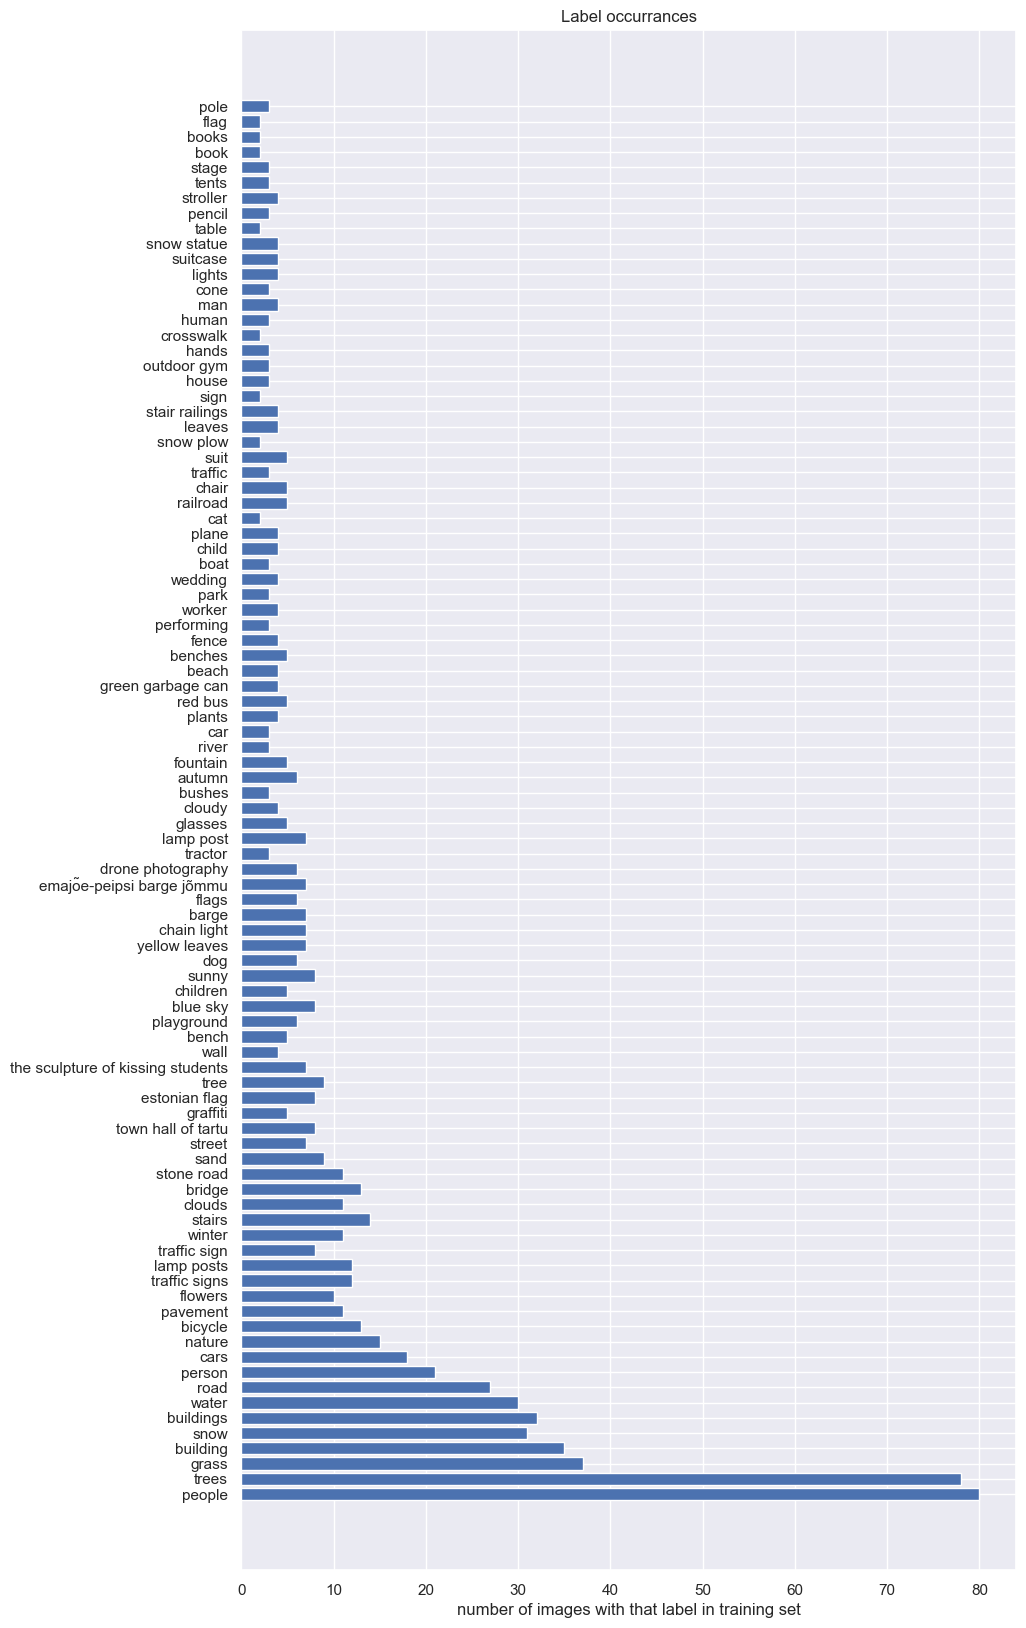

In [29]:
# Plot the occurrances
# Idea to put names to y axis from Joosep
plt.figure(figsize=(10,20))
plt.barh(np.arange(92), label_occurrances)
plt.yticks(np.arange(92), label_names)
plt.title('Label occurrances')
plt.xlabel('number of images with that label in training set')
plt.show()

#plt.figure(figsize=(16,8))
#plt.plot(label_occurrances)
#plt.title('Label occurrances')
#plt.ylabel('count')
#plt.xlabel('label')
#plt.show()

In [16]:
label_names

['a', 'b']